The mean is 69.50428696412948


/var/folders/vw/8njc20dn7_91y36272jnyk240000gn/T/ipykernel_3500/2622152355.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0 #if its below 70 it is 0(low)
/var/folders/vw/8njc20dn7_91y36272jnyk240000gn/T/ipykernel_3500/2622152355.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1 #if life expectancy is above 70, it is 1(high)


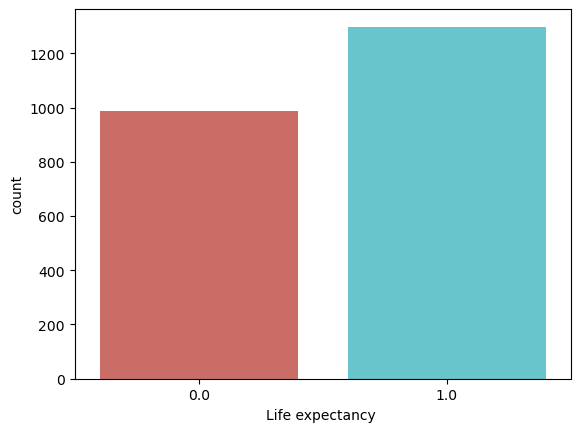

[0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.

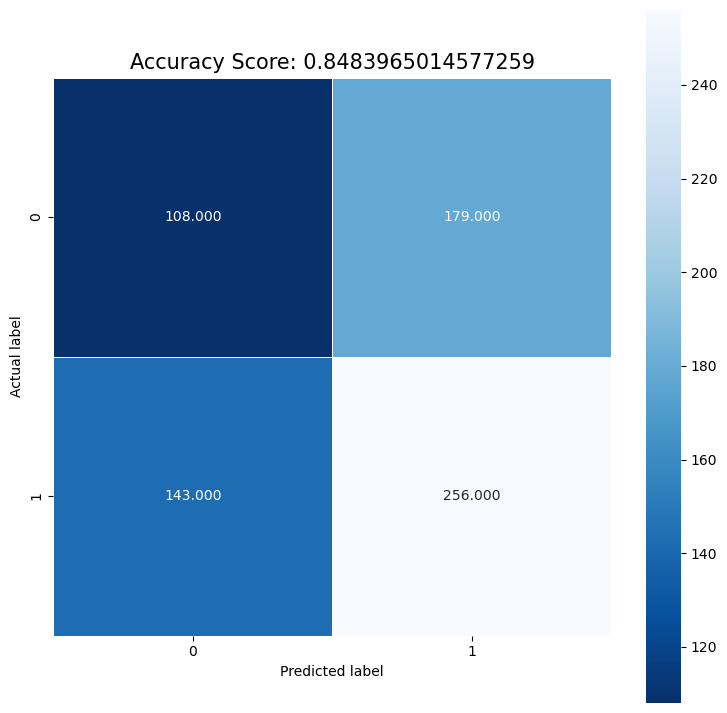

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score


yList = [] #empty list
data = pd.read_csv('Life Expectancy Data.csv')
#features
X = data[['Adult Mortality',' BMI ',' HIV/AIDS','Income composition of resources','Schooling']]
#target variable
y = data['Life expectancy ']

mean = np.mean(y)
print ("The mean is",mean)

#inserts(into list)life expectancy data into categories (0 to 1)
for i in range(len(y)):
    if y[i] >= 70: #the mean life expectancy
        y[i] = 1 #if life expectancy is above 70, it is 1(high)
        yList.append(1)
    else:
        y[i] = 0 #if its below 70 it is 0(low)
        yList.append(0)
        
#count visual, showing how many countries life expectancy is above/below average
sns.countplot(x ='Life expectancy ', data = data, palette = 'hls' )
plt.show()

        
#training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = LogisticRegression()
model.fit(X_train, y_train)


y_prediction = model.predict(X_test)
print (y_prediction)
accuracy = accuracy_score(y_test, y_prediction)
 




print ("Accuracy:", accuracy)
print ("f1 Score:", f1_score(y_test, y_pred) )

cm = confusion_matrix(y_test,y_pred)
#code to visualize confusion matrix (from Galarnyk)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
